<a href="https://colab.research.google.com/github/EvgenyEsin/Python_libraries_for_DS/blob/main/Python_libraries_for_DS_DZ_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ к семинару 5
1. Определение скорости обучения
Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
Запишите и сравните результаты метрик качества и скорости сходимости модели.

2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском.

3. Сравнить разные алгоритмы оптимизации.

— На исходном наборе данных обучить модель логистической регрессии, используя разные оптимизаторы, и сравнить их эффективность.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier #реализует стохастический градиентный спуск (SGD) для классификации.
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report


## Загрузка данных

In [2]:
df  = pd.read_csv('Cancer_Data.csv',  sep=',')
df = df.drop(['Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})
df.set_index("id", inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())
/

Размер датасета: (569, 31)
Пропущенные значения:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


()

## EDA

In [4]:
df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000000,0.627417,0.483918,0.000000,0.000000,1.000000,1.000000,1.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


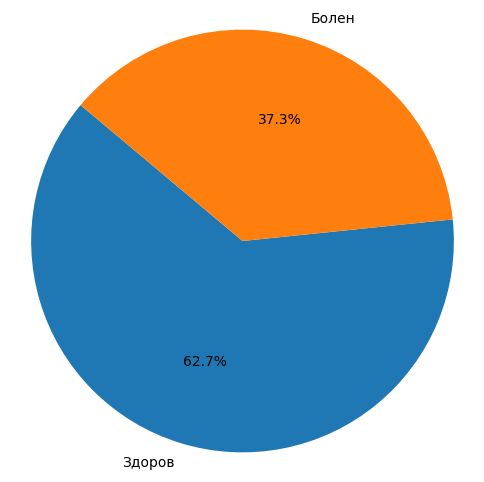

In [5]:
diagnosis_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=['Здоров', 'Болен'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()


## Подготовка данных к обучению

In [6]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## №1 Обучение модели лог.регрессии с разными скоростями обучения

In [7]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
results = []

# eta0 - начальная скорость обучения
# Когда learning_rate='constant': eta0 остается постоянным в течение всего процесса обучения.
# tol = 1e-4 Обучение прекращается, если изменения функции потерь меньше 0.0001
for lr in learning_rates:
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=lr, max_iter=1000, tol=1e-4, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Learning Rate': lr,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Number of Iterations': model.n_iter_
    })
results_df = pd.DataFrame(results)
results_df



,Learning Rate,Accuracy,Precision,Recall,F1 Score,Number of Iterations
0,0.001,0.991228,0.986111,1.000000,0.993007,188
1,0.010,0.982456,0.985915,0.985915,0.985915,117
2,0.100,0.982456,0.985915,0.985915,0.985915,32
3,0.500,0.982456,0.985915,0.985915,0.985915,14
4,1.000,0.982456,0.985915,0.985915,0.985915,10


## №2 Обучение модели со стохастическим градиентного спуском.

In [8]:
# Обучение модели с использованием SGD
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-4, random_state=42, eta0=0.001)
sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

# Обучение модели с использованием стандартного градиентного спуска
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Iterations'],
    'SGD': [accuracy_sgd, precision_sgd, recall_sgd, f1_sgd, sgd_model.n_iter_],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr, 'N/A']  # Для LogisticRegression n_iter_ не доступен
}

results_df = pd.DataFrame(results)
results_df


,Metric,SGD,Logistic Regression
0,Accuracy,0.947368,0.982456
1,Precision,0.971014,0.985915
2,Recall,0.943662,0.985915
3,F1 Score,0.957143,0.985915
4,Iterations,22.000000,N/A


## №3 Сравнить разные алгоритмы оптимизации


In [9]:
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
results = []

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    training_time = end_time - start_time

    results.append({
        'Solver': solver,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Training Time (s)': training_time
    })

results_df = pd.DataFrame(results)
results_df


,Solver,Accuracy,Precision,Recall,F1 Score,Training Time (s)
0,liblinear,0.991228,0.986111,1.000000,0.993007,0.007041
1,lbfgs,0.982456,0.985915,0.985915,0.985915,0.022644
2,newton-cg,0.982456,0.985915,0.985915,0.985915,0.021557
3,sag,0.991228,0.986111,1.000000,0.993007,0.143111
4,saga,0.991228,0.986111,1.000000,0.993007,0.167212


В данном случае наиболее лучшими оказались оптимизаторы:
* 'liblinear': координатный спуск (Coordinate Descent, CD)
* 'sag': Стохастический градиентный спуск с использованием среднего градиента.
* 'saga': Расширение 'sag', поддерживает L1-регуляризацию